# TestFile1

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/TestFile1.txt").astype(np.float32)
eeg_data.shape

(12, 165760)

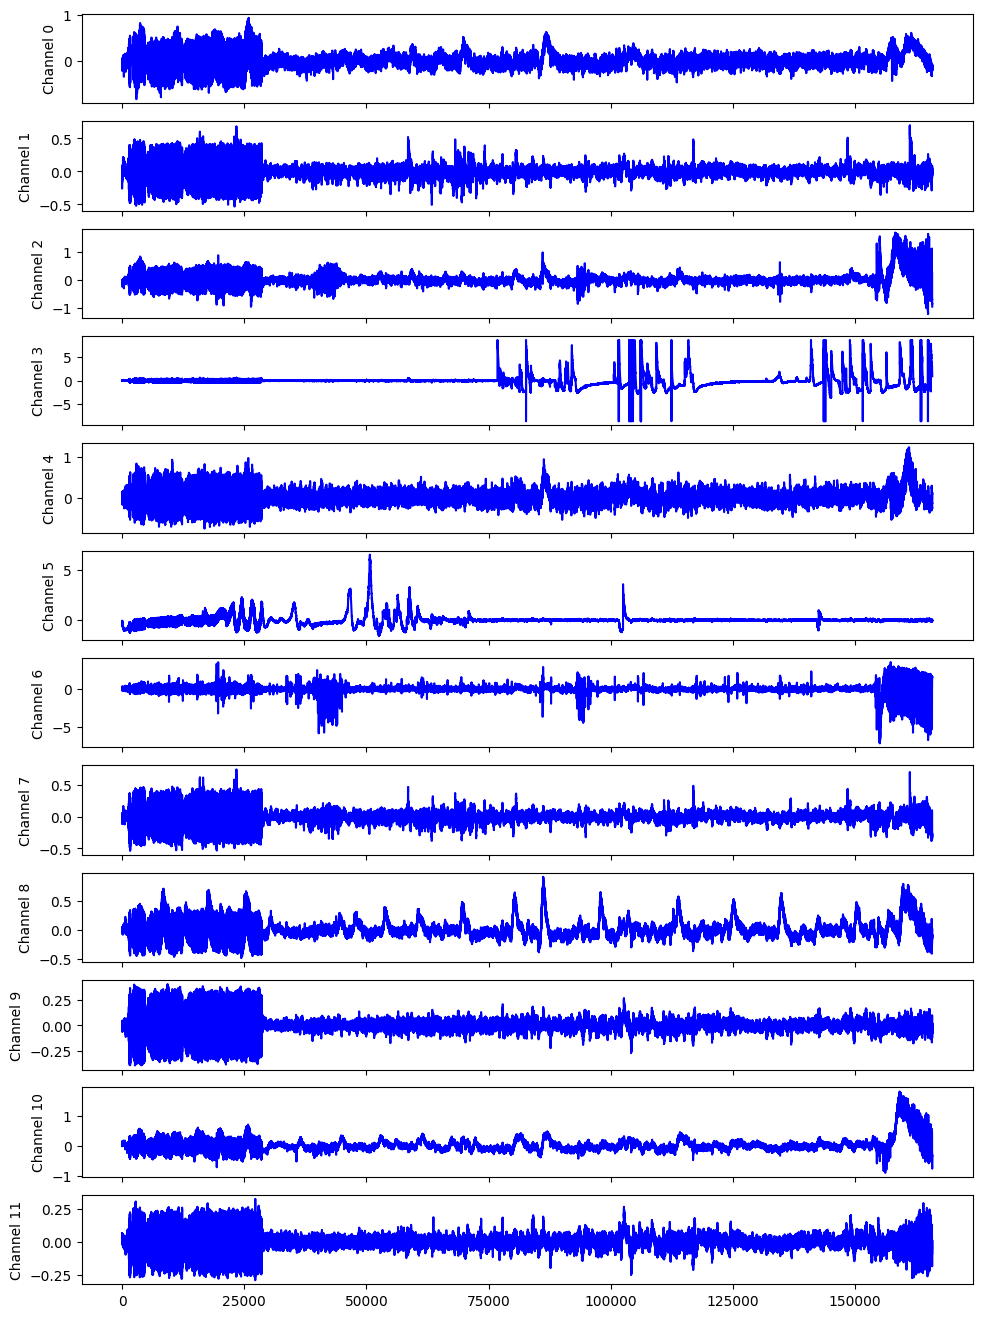

In [182]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [183]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

# Change Point 1

In [184]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

# warm up for 200 seconds and create saliency maps (10 s)
fftwarm = CPD.warm.FFTWarm(channels, n0=150, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [185]:
import CPD.CPD
reload(CPD.CPD)

cpd = CPD.CPD.Online(fftwarm, k=5, prob=0.89)

change_points = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 150
channel_5 detected change point! Halting.
channel_2 detected change point! Halting.
channel_8 detected change point! Halting.
STEP 151
STEP 152
STEP 153
STEP 154
STEP 155
STEP 156
STEP 157
STEP 158
STEP 159
STEP 160
STEP 161
STEP 162
STEP 163
STEP 164
STEP 165
STEP 166
STEP 167
STEP 168
STEP 169
STEP 170
STEP 171
STEP 172
STEP 173
STEP 174
STEP 175
STEP 176
STEP 177
STEP 178
STEP 179
STEP 180
STEP 181
STEP 182
STEP 183
STEP 184
STEP 185
STEP 186
STEP 187
STEP 188
STEP 189
STEP 190
STEP 191
STEP 192
STEP 193
STEP 194
STEP 195
STEP 196
STEP 197
STEP 198
STEP 199
STEP 200
STEP 201
STEP 202
STEP 203
STEP 204
STEP 205
STEP 206
STEP 207
STEP 208
STEP 209
STEP 210
STEP 211
STEP 212
STEP 213
STEP 214
STEP 215
STEP 216
STEP 217
STEP 218
STEP 219
STEP 220
STEP 221
STEP 222
STEP 223
STEP 224
STEP 225
STEP 226
STEP 227
STEP 228
STEP 229
STEP 230
STEP 231
STEP 232
STEP 233
STEP 234
STEP 235
STEP 236
STEP 237
STEP 238
STEP 239
STEP 240
STEP 241
STEP 242
STEP 243
STEP 244
STEP 245
STEP 246
S

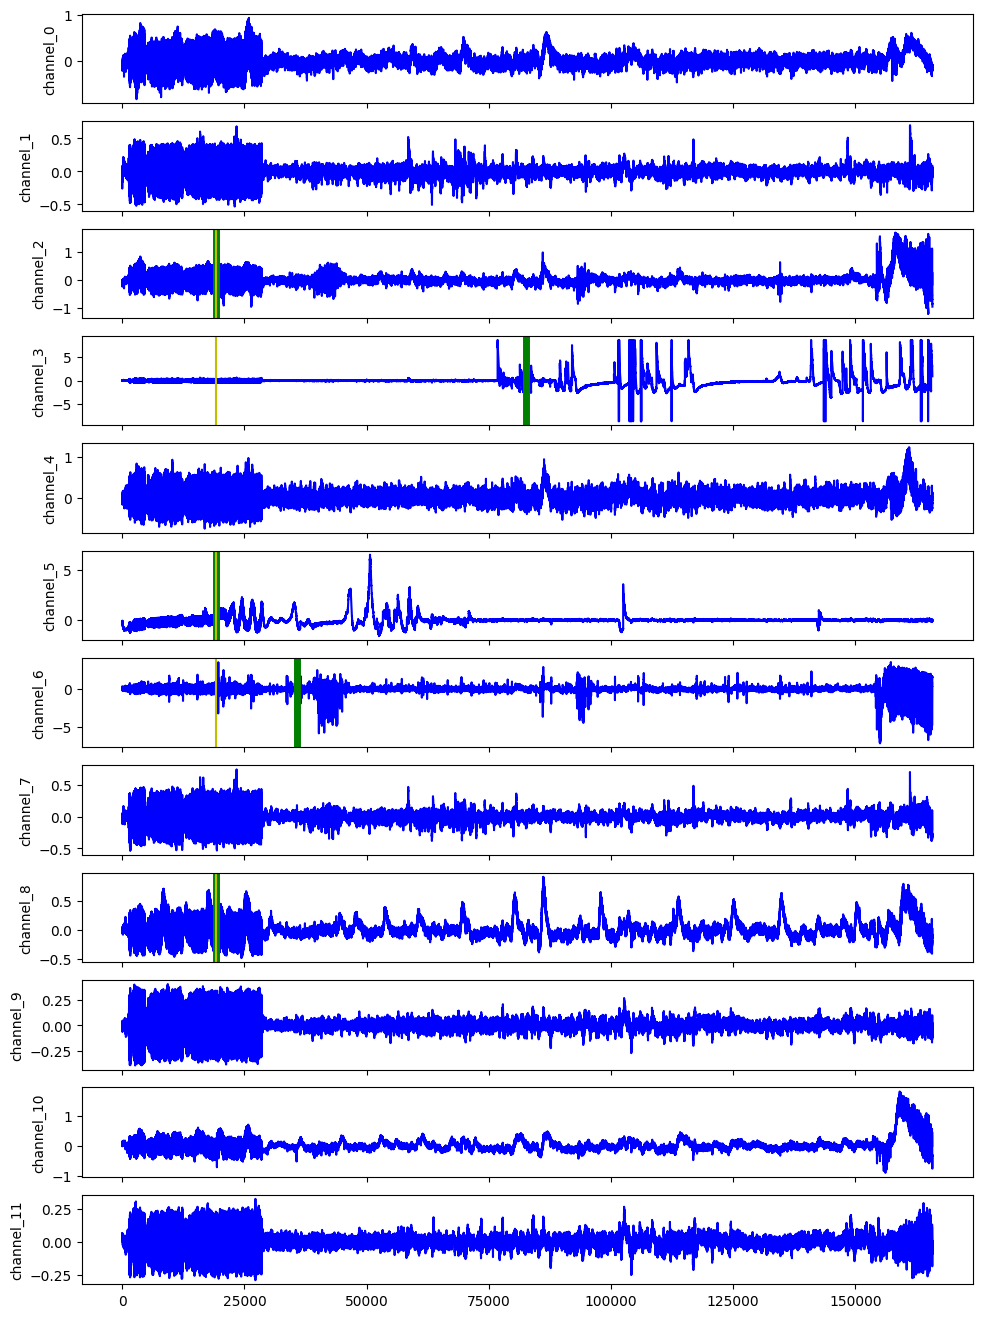

In [186]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 150 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    if chan in change_points:
        chan_cpt = change_points[chan]
        axs[c].axvline(x=chan_cpt, c='g', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)

# Change Point 2

In [187]:
# get data past detected change-point `t=82176`

channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [188]:
# warm up for 200 seconds and create saliency maps
fftwarm = CPD.warm.FFTWarm(channels, n0=150, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [189]:
cpd = CPD.CPD.Online(fftwarm, k=5, prob=0.89)

change_points = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR ...

STEP 150
channel_3 detected change point! Halting.
STEP 151
STEP 152
STEP 153
STEP 154
STEP 155
STEP 156
STEP 157
STEP 158
STEP 159
STEP 160
STEP 161
STEP 162
STEP 163
STEP 164
STEP 165
STEP 166
STEP 167
STEP 168
STEP 169
STEP 170
STEP 171
STEP 172
STEP 173
STEP 174
STEP 175
STEP 176
STEP 177
STEP 178
STEP 179
STEP 180
STEP 181
STEP 182
STEP 183
STEP 184
STEP 185
STEP 186
STEP 187
STEP 188
STEP 189
STEP 190
STEP 191
STEP 192
STEP 193
STEP 194
STEP 195
STEP 196
STEP 197
STEP 198
STEP 199
STEP 200
STEP 201
STEP 202
STEP 203
STEP 204
STEP 205
STEP 206
STEP 207
STEP 208
STEP 209
STEP 210
STEP 211
STEP 212
STEP 213
STEP 214
STEP 215
STEP 216
STEP 217
STEP 218
STEP 219
STEP 220
STEP 221
STEP 222
STEP 223
STEP 224
STEP 225
STEP 226
STEP 227
STEP 228
STEP 229
STEP 230
STEP 231
STEP 232
STEP 233
STEP 234
STEP 235
STEP 236
STEP 237
STEP 238
STEP 239
STEP 240
STEP 241
STEP 242
STEP 243
STEP 244
STEP 245
STEP 246
STEP 247
STEP 248
STEP 249
STEP 250
STEP 251
STEP 252
STEP 253
STEP 254
STEP 255
STEP

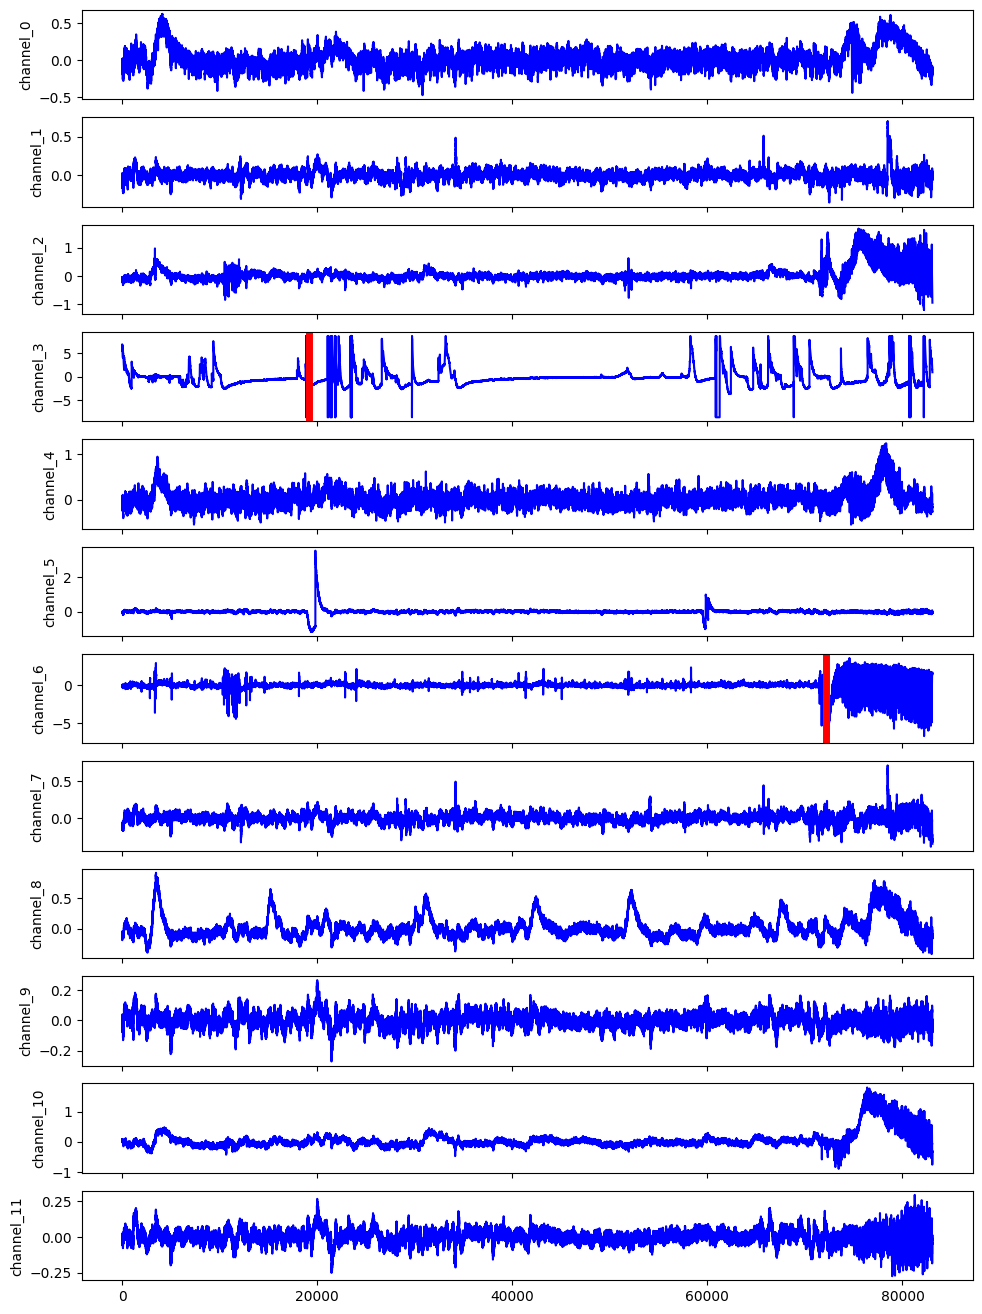

In [190]:
time = [i for i in range(channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    if chan in change_points:
        next_cpt = change_points[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)

    axs[c].set_ylabel(chan)


# TestFile2

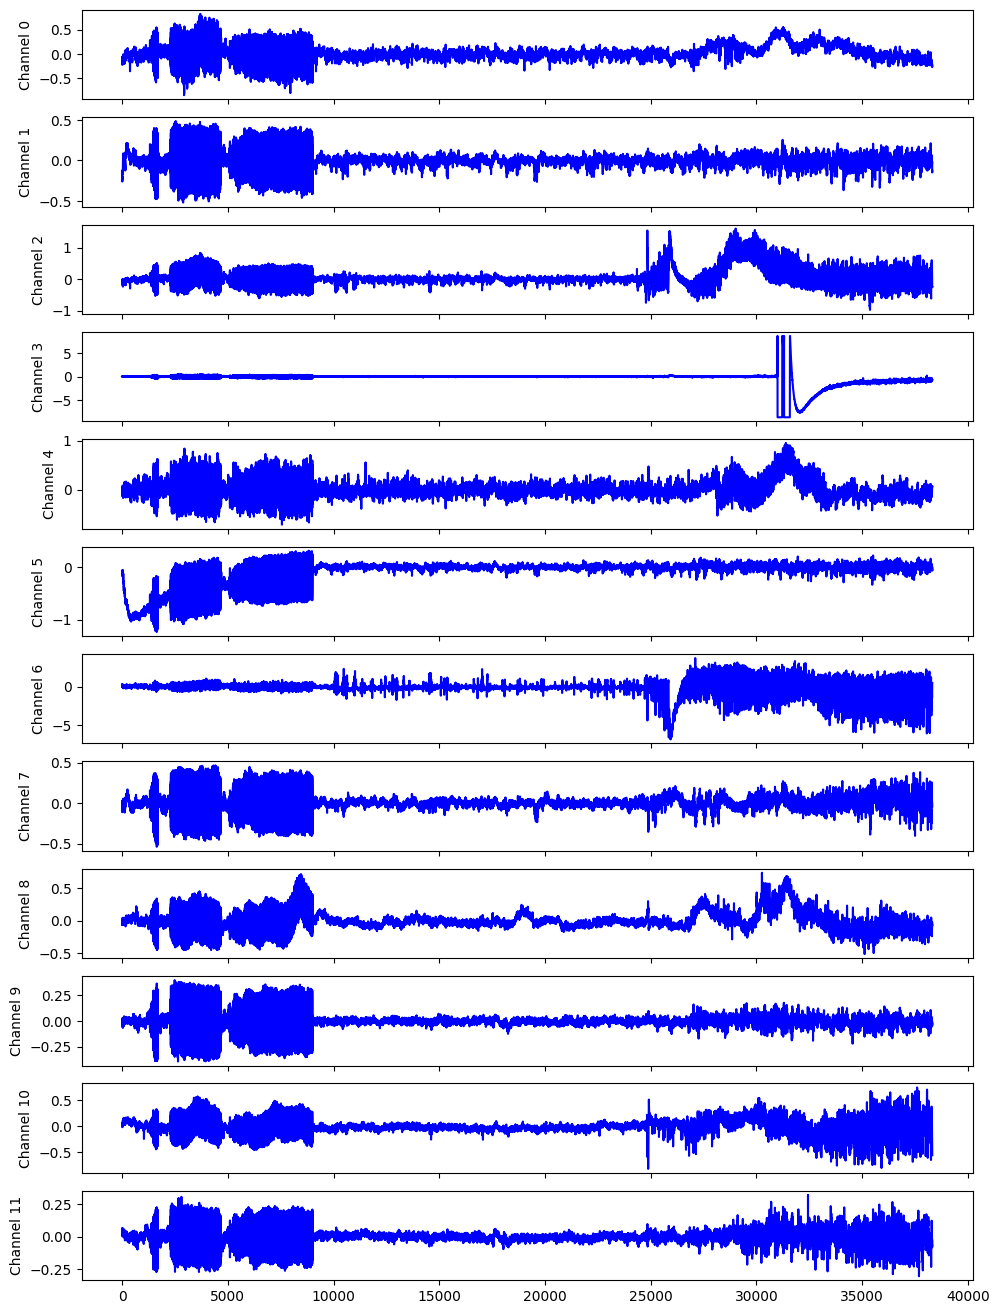

In [192]:
# get data
eeg_data = np.genfromtxt("data/TestFile2.txt").astype(np.float32)

# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

# Change Point 1

In [197]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

from importlib import reload
import CPD.warm

reload(CPD.warm)

# warm up for 50 seconds and create saliency maps (10 s)
fftwarm = CPD.warm.FFTWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [201]:
import CPD.CPD
reload(CPD.CPD)

cpd = CPD.CPD.Online(fftwarm, k=7, prob=0.85)

change_points = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
channel_5 detected change point! Halting.
channel_9 detected change point! Halting.
channel_2 detected change point! Halting.
channel_8 detected change point! Halting.
channel_3 detected change point! Halting.
STEP 51
STEP 52
STEP 53
STEP 54
STEP 55
STEP 56
STEP 57
STEP 58
STEP 59
STEP 60
STEP 61
STEP 62
STEP 63
STEP 64
STEP 65
STEP 66
STEP 67
STEP 68
STEP 69
STEP 70
STEP 71
STEP 72
STEP 73
STEP 74
STEP 75
STEP 76
STEP 77
STEP 78
STEP 79
STEP 80
STEP 81
STEP 82
STEP 83
STEP 84
STEP 85
STEP 86
STEP 87
STEP 88
STEP 89
STEP 90
STEP 91
STEP 92
STEP 93
STEP 94
STEP 95
STEP 96
STEP 97
STEP 98
STEP 99
STEP 100
STEP 101
STEP 102
STEP 103
STEP 104
STEP 105
STEP 106
STEP 107
STEP 108
STEP 109
STEP 110
STEP 111
STEP 112
STEP 113
STEP 114
STEP 115
STEP 116
STEP 117
STEP 118
STEP 119
STEP 120
STEP 121
STEP 122
STEP 123
STEP 124
STEP 125
STEP 126
STEP 127
STEP 128
STEP 129
STEP 130
STEP 131
STEP 132
STEP 133
STEP 134
STEP 135
STEP 136
STEP 137
STEP 138
STEP 139
STEP 140
STEP 141
STEP 142
STE

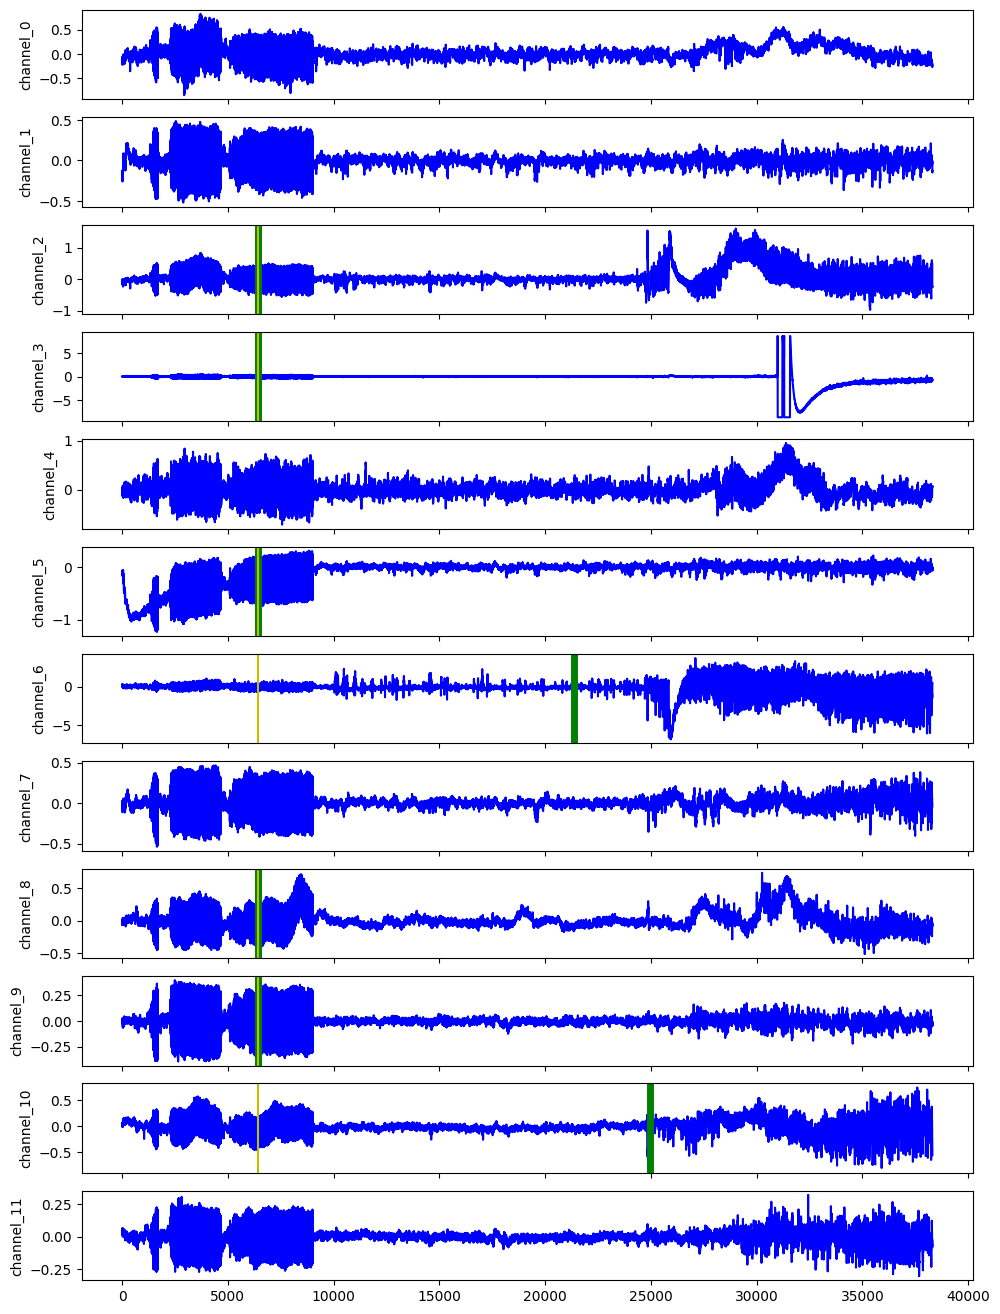

In [202]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 50 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    if chan in change_points:
        chan_cpt = change_points[chan]
        axs[c].axvline(x=chan_cpt, c='g', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)

# Change Point 2

In [203]:
# get data past detected change-point `t=82176`
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [204]:
# warm up for 200 seconds and create saliency maps
fftwarm = CPD.warm.FFTWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [205]:
import CPD.CPD
reload(CPD.CPD)

cpd = CPD.CPD.Online(fftwarm, k=7, prob=0.85)

change_points = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
channel_3 detected change point! Halting.
STEP 51
STEP 52
STEP 53
STEP 54
STEP 55
STEP 56
STEP 57
STEP 58
STEP 59
STEP 60
STEP 61
STEP 62
STEP 63
STEP 64
STEP 65
STEP 66
STEP 67
STEP 68
STEP 69
STEP 70
STEP 71
STEP 72
STEP 73
STEP 74
STEP 75
STEP 76
STEP 77
STEP 78
STEP 79
STEP 80
STEP 81
STEP 82
STEP 83
STEP 84
STEP 85
STEP 86
STEP 87
STEP 88
STEP 89
STEP 90
STEP 91
STEP 92
STEP 93
STEP 94
STEP 95
STEP 96
STEP 97
STEP 98
STEP 99
STEP 100
STEP 101
STEP 102
STEP 103
STEP 104
STEP 105
Past!
No more data! Stopped at step 105
change point detected at t=6400


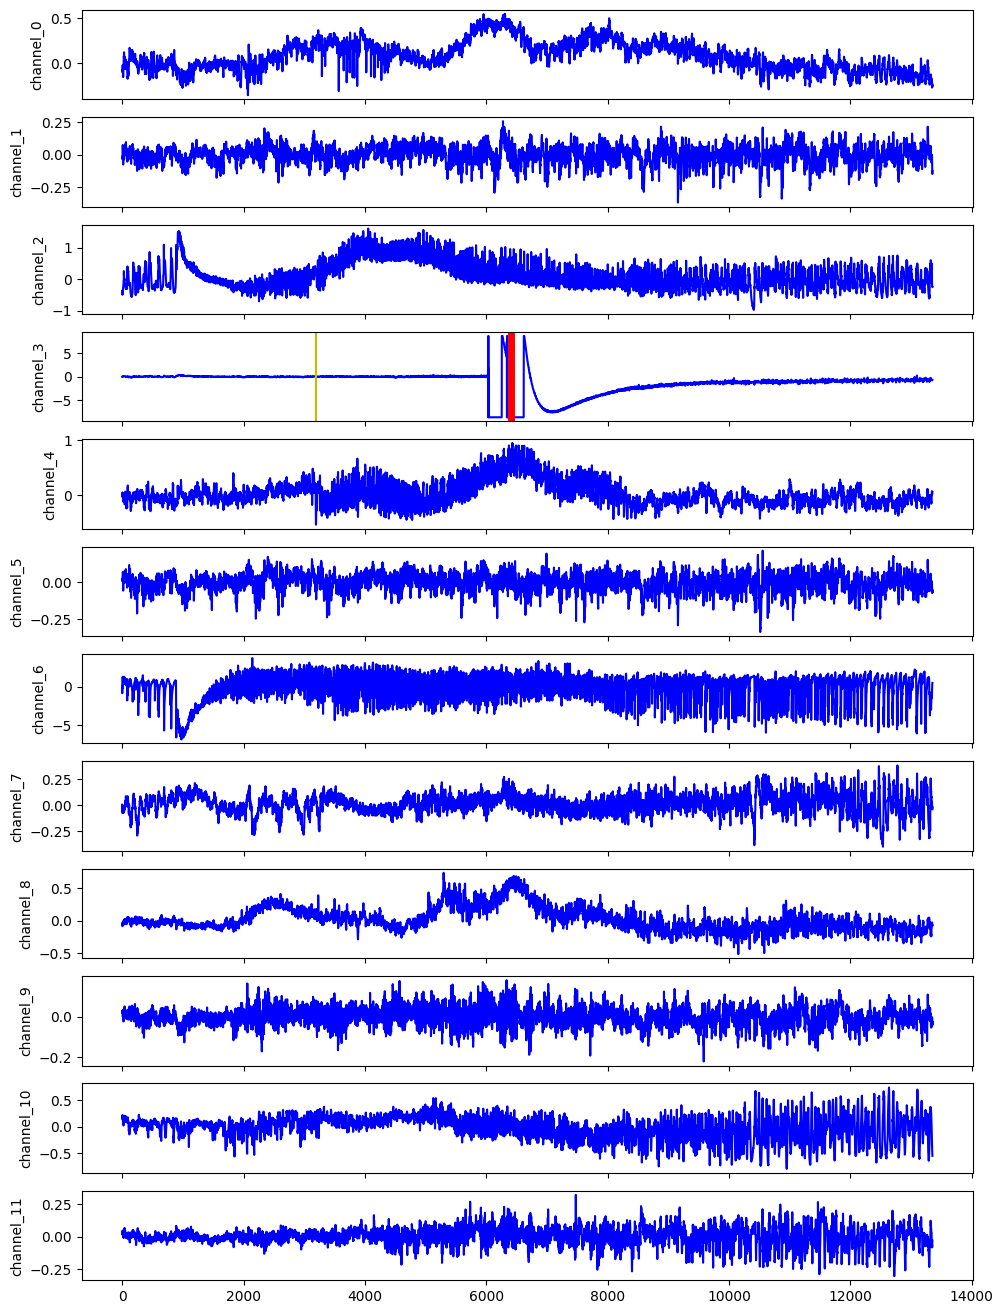

In [206]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 25 * 128

fig, axs = plt.subplots(len(channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    if chan in change_points:
        next_cpt = change_points[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)


# TestFile3

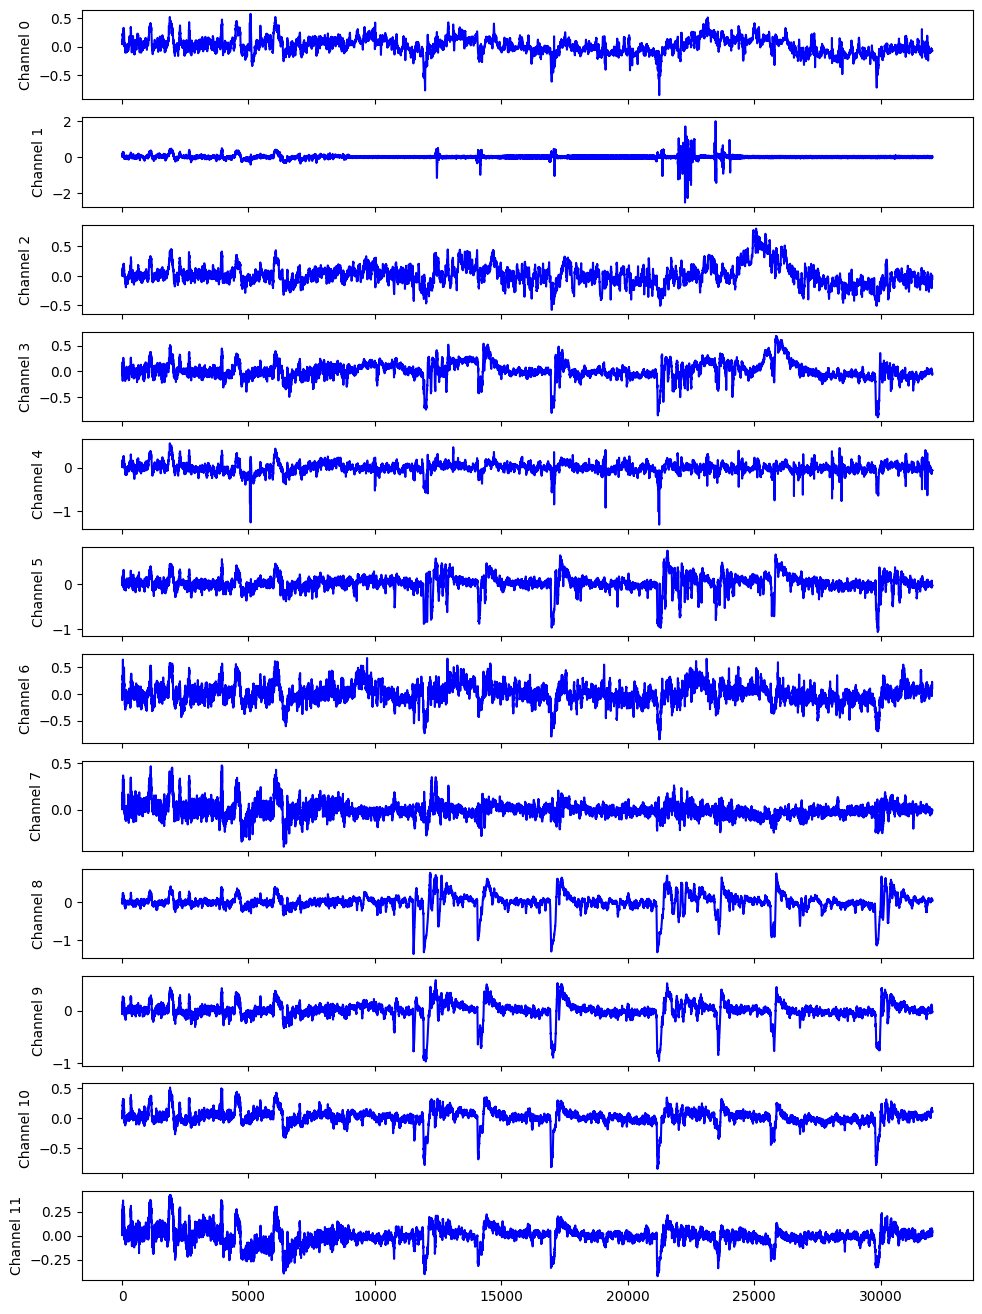

In [207]:
# get data
eeg_data = np.genfromtxt("data/TestFile3.txt").astype(np.float32)

# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

# Change Point 1

In [225]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

from importlib import reload
import CPD.warm

reload(CPD.warm)

# warm up for 50 seconds and create saliency maps 
fftwarm = CPD.warm.FFTWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [226]:
import CPD.CPD
reload(CPD.CPD)

cpd = CPD.CPD.Online(fftwarm, k=3, prob=0.85)

change_points = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
STEP 51
STEP 52
STEP 53
STEP 54
STEP 55
STEP 56
STEP 57
STEP 58
STEP 59
STEP 60
STEP 61
STEP 62
STEP 63
STEP 64
STEP 65
STEP 66
STEP 67
STEP 68
STEP 69
STEP 70
STEP 71
STEP 72
STEP 73
STEP 74
STEP 75
STEP 76
STEP 77
STEP 78
STEP 79
STEP 80
STEP 81
STEP 82
STEP 83
STEP 84
STEP 85
STEP 86
STEP 87
STEP 88
STEP 89
STEP 90
STEP 91
STEP 92
STEP 93
STEP 94
STEP 95
STEP 96
STEP 97
STEP 98
STEP 99
STEP 100
STEP 101
STEP 102
STEP 103
STEP 104
STEP 105
STEP 106
STEP 107
STEP 108
STEP 109
STEP 110
STEP 111
STEP 112
STEP 113
STEP 114
STEP 115
STEP 116
STEP 117
STEP 118
STEP 119
STEP 120
STEP 121
STEP 122
STEP 123
STEP 124
STEP 125
STEP 126
STEP 127
STEP 128
STEP 129
STEP 130
STEP 131
STEP 132
STEP 133
STEP 134
channel_4 detected change point! Halting.
STEP 135
STEP 136
STEP 137
STEP 138
STEP 139
STEP 140
STEP 141
STEP 142
STEP 143
STEP 144
STEP 145
STEP 146
STEP 147
STEP 148
STEP 149
STEP 150
STEP 151
STEP 152
STEP 153
STEP 154
STEP 155
STEP 156
STEP 157
STEP 158
STEP 159
STEP 160
STEP 161


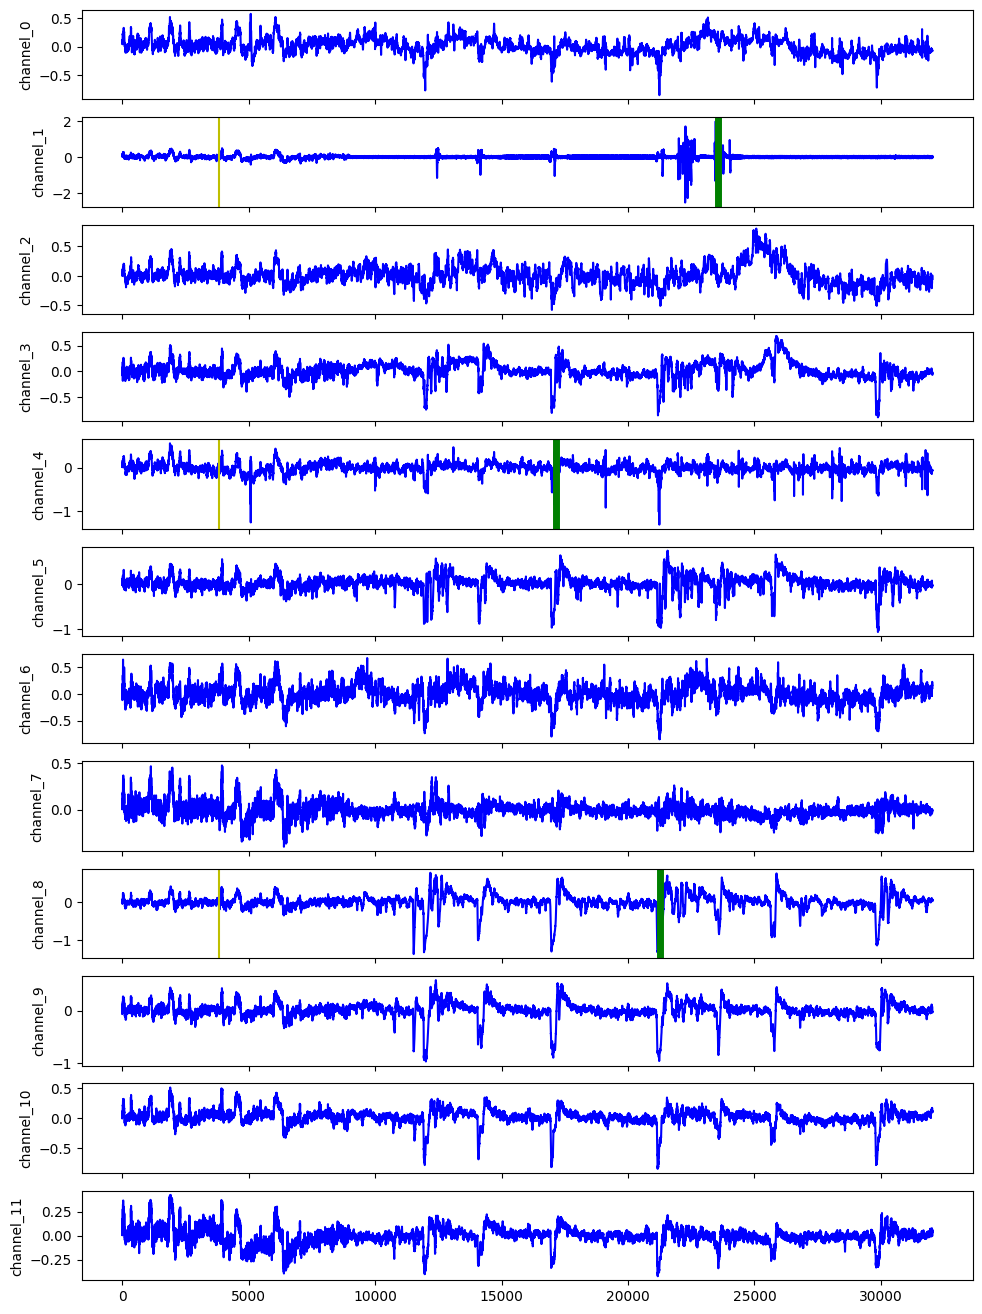

In [227]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 30 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    if chan in change_points:
        chan_cpt = change_points[chan]
        axs[c].axvline(x=chan_cpt, c='g', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)

# Change Point 2

In [228]:
# get data past detected change-point
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [229]:
# warm up for 200 seconds and create saliency maps
fftwarm = CPD.warm.FFTWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [230]:
import CPD.CPD
reload(CPD.CPD)

cpd = CPD.CPD.Online(fftwarm, k=3, prob=0.85)

change_points = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
STEP 51
STEP 52
STEP 53
STEP 54
STEP 55
STEP 56
STEP 57
STEP 58
STEP 59
STEP 60
STEP 61
STEP 62
STEP 63
STEP 64
STEP 65
STEP 66
STEP 67
Past!
No more data! Stopped at step 67


ValueError: max() arg is an empty sequence

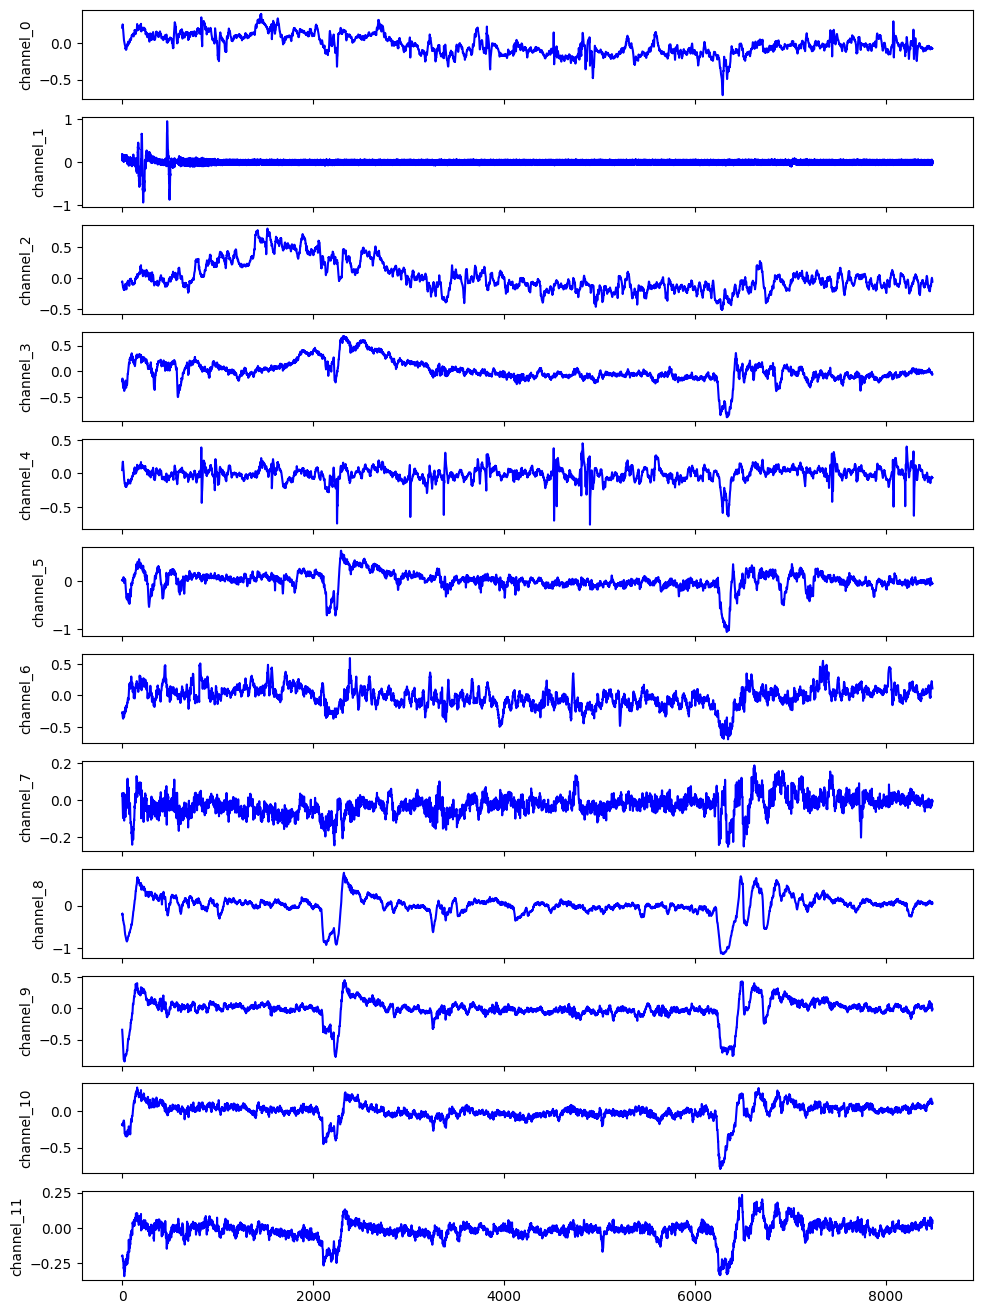

In [231]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 25 * 128

fig, axs = plt.subplots(len(channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    if chan in change_points:
        next_cpt = change_points[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)
